# Libraries

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
from wordcloud import WordCloud

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier

# Preprocessing

## Merging all the files to single df

In [45]:
def load_reviews_from_folder(folder_path, label):
    reviews = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding="utf-8") as file:
                reviews.append((file.read(), label))
    return reviews


In [46]:
# Paths to train and test directories
train_pos_path = 'task3 dataset/aclImdb 2/train/pos'
train_neg_path = 'task3 dataset/aclImdb 2/train/neg'
test_pos_path = 'task3 dataset/aclImdb 2/test/pos'
test_neg_path = 'task3 dataset/aclImdb 2/test/neg'

# Load reviews
train_pos = load_reviews_from_folder(train_pos_path, 1)  # Label 1 for positive
train_neg = load_reviews_from_folder(train_neg_path, 0)  # Label 0 for negative
test_pos = load_reviews_from_folder(test_pos_path, 1)
test_neg = load_reviews_from_folder(test_neg_path, 0)

# Combine and create DataFrames
train_reviews = train_pos + train_neg
test_reviews = test_pos + test_neg

# Convert to pandas DataFrames
train_df = pd.DataFrame(train_reviews, columns=['review', 'sentiment'])
test_df = pd.DataFrame(test_reviews, columns=['review', 'sentiment'])


In [47]:
train_df

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1
...,...,...
24995,"My comments may be a bit of a spoiler, for wha...",0
24996,"The ""saucy"" misadventures of four au pairs who...",0
24997,"Oh, those Italians! Assuming that movies about...",0
24998,Eight academy nominations? It's beyond belief....,0


In [48]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)


In [49]:
print(train_df.head())
print(test_df.head())


                                              review  sentiment
0  While I can't deny that his movies are often e...          0
1  The reason why I say this is because I wrote t...          1
2  A masterful treatment of James Caine's "The Po...          1
3  ELEPHANT WALK was a thoroughly dull film and I...          0
4  There is nothing remotely scary about modern "...          1
                                              review  sentiment
0  I'm sorry to say this but I didn't enjoy this ...          0
1  This is by far one of the best films that Indi...          1
2  Doctor Who is amazing. It is everyones 'cup of...          1
3  As someone has already mentioned on this board...          0
4  It ends with the declaration that "the film yo...          1


In [50]:
df = train_df 

In [51]:
df

,review,sentiment
0,While I can't deny that his movies are often e...,0
1,The reason why I say this is because I wrote t...,1
2,"A masterful treatment of James Caine's ""The Po...",1
3,ELEPHANT WALK was a thoroughly dull film and I...,0
4,"There is nothing remotely scary about modern ""...",1
...,...,...
24995,If there was some weird inversed Oscar Academy...,0
24996,"He's stocky, sweaty, slightly cross-eyed and r...",1
24997,In the rapid economic development of 1990's in...,1
24998,"First off, I must say that I made the mistake ...",1


## Convert all text in the 'review' column to lowercase

In [52]:

df['review'] = df['review'].str.lower()

## Function to remove HTML tags

In [53]:

def remove_html_tags(text):
    clean = re.sub(r'<.*?>', '', text)
    return clean

# Apply function to 'review' column
df['review'] = df['review'].apply(remove_html_tags)

## Keeps only alphanumeric characters and spaces

In [54]:
def remove_special_characters(text):
    clean = re.sub(r'[^A-Za-z0-9\s]', '', text)  
    return clean

# Apply function to 'review' column
df['review'] = df['review'].apply(remove_special_characters)

## Remove all numeric characters

In [55]:
def remove_numbers(text):
    clean = re.sub(r'\d+', '', text)  
    return clean

# Apply function to 'review' column
df['review'] = df['review'].apply(remove_numbers)

## Function to remove extra whitespaces

In [56]:

def remove_extra_whitespaces(text):
    clean = re.sub(r'\s+', ' ', text).strip()  # Replaces multiple spaces with a single space and trims
    return clean

# Apply function to 'review' column
df['review'] = df['review'].apply(remove_extra_whitespaces)

## Tokenize the 'review' column

In [57]:

df['review'] = df['review'].apply(word_tokenize)

## Function to remove stop words

In [58]:
# Get the list of English stop words
stop_words = set(stopwords.words('english'))


def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply function to 'review' column
df['review'] = df['review'].apply(remove_stop_words)

## Apply the stemming function to the 'review' column

In [59]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem tokens
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]



df['review'] = df['review'].apply(stem_tokens)


In [60]:
df

,review,sentiment
0,"[cant, deni, movi, often, entertain, alway, pe...",0
1,"[reason, say, wrote, screenplay, knew, littl, ...",1
2,"[master, treatment, jame, cain, postman, alway...",1
3,"[eleph, walk, thoroughli, dull, film, realli, ...",0
4,"[noth, remot, scari, modern, horror, insult, w...",1
...,...,...
24995,"[weird, invers, oscar, academi, award, festiv,...",0
24996,"[he, stocki, sweati, slightli, crossey, restle...",1
24997,"[rapid, econom, develop, china, resurg, tradit...",1
24998,"[first, must, say, made, mistak, watch, elect,...",1


In [61]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

# EDA

## Distribution of Reviews

In [62]:
# Check the distribution of sentiments
print(df['sentiment'].value_counts())

# Basic statistics of the text length
df['text_length'] = df['review'].apply(len)
print(df['text_length'].describe())

sentiment
0    12500
1    12500
Name: count, dtype: int64
count    25000.000000
mean       119.942720
std         90.405793
min          4.000000
25%         64.000000
50%         89.000000
75%        146.000000
max       1420.000000
Name: text_length, dtype: float64


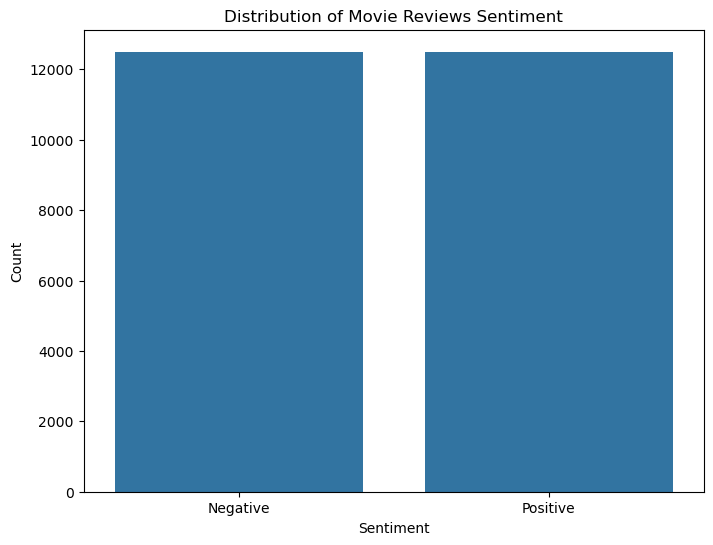

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Movie Reviews Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

## Visualize the distribution

Review Length Statistics:
Mean Length: 119.94272
Median Length: 89.0
Max Length: 1420.0


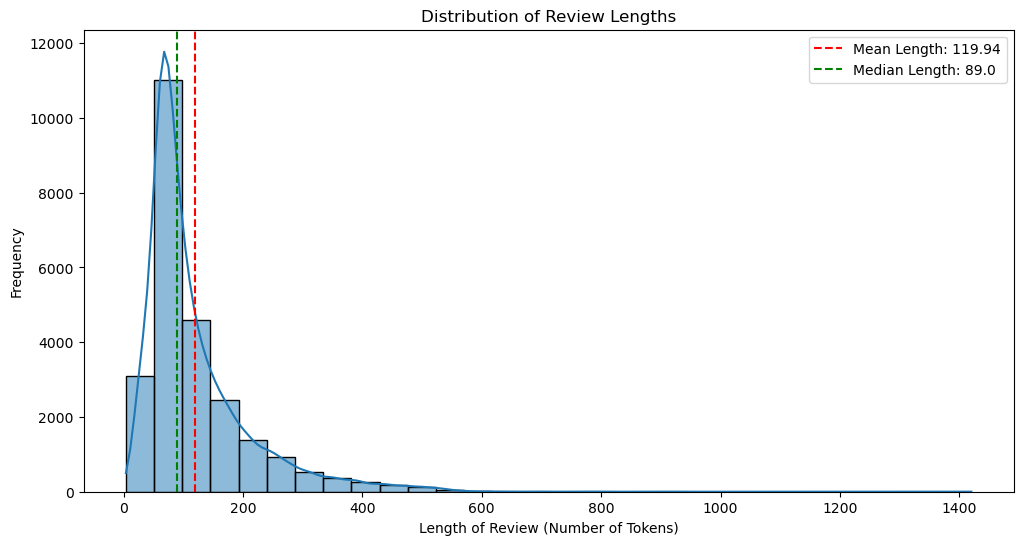

In [64]:
# Step 1: Calculate review lengths
df['review_length'] = df['review'].apply(len)

# Step 2: Summarize basic statistics
length_stats = df['review_length'].describe()  # Summary statistics
mean_length = length_stats['mean']
median_length = length_stats['50%']  # 50% quantile is the median
max_length = length_stats['max']

print("Review Length Statistics:")
print(f"Mean Length: {mean_length}")
print(f"Median Length: {median_length}")
print(f"Max Length: {max_length}")

# Step 3: Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review (Number of Tokens)')
plt.ylabel('Frequency')
plt.axvline(mean_length, color='r', linestyle='--', label=f'Mean Length: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='--', label=f'Median Length: {median_length}')
plt.legend()
plt.show()

## Plotting the most common words

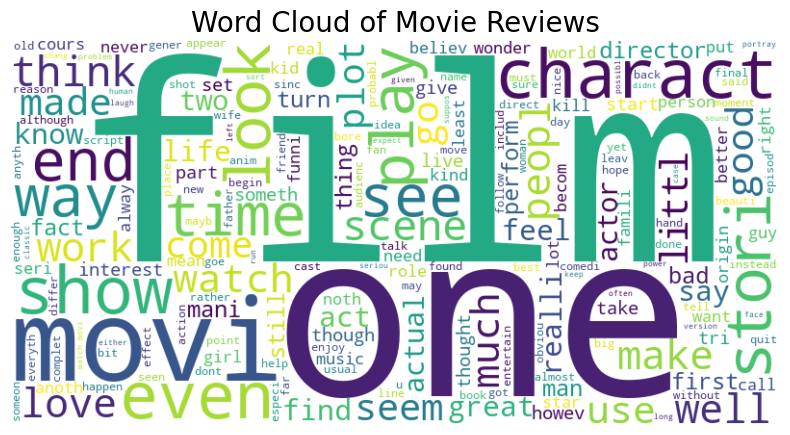

/var/folders/__/myg_fwx179xcwtmwxj8q16_h0000gn/T/ipykernel_91720/2330666764.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')


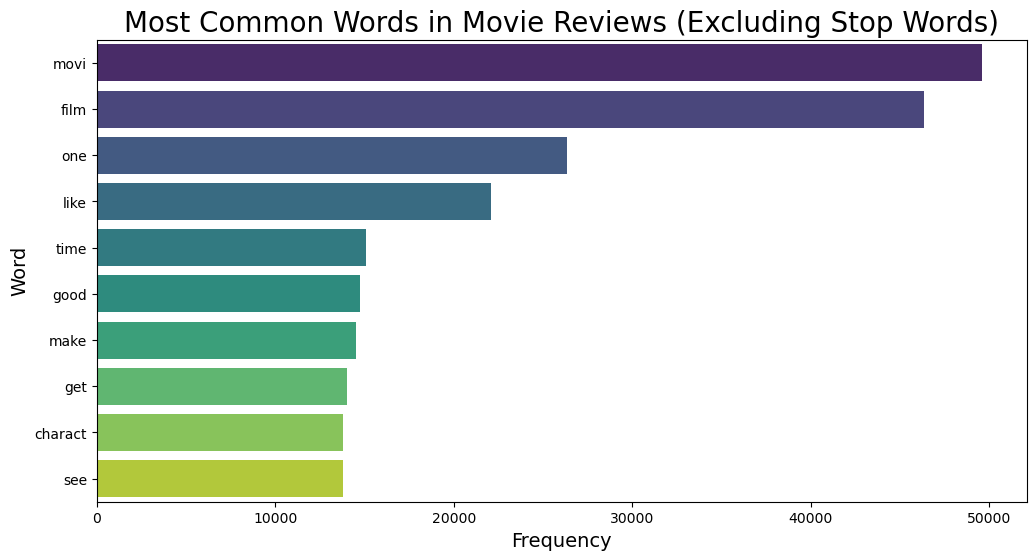

In [65]:
# Step 1: Join the tokens into a single string
all_words = ' '.join([' '.join(review) for review in df['review']])

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                      max_words=200, contour_color='steelblue', contour_width=1).generate(all_words)

# Step 3: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Movie Reviews', fontsize=20)
plt.show()

# Optional: Identify and plot the most common words excluding stop words
from collections import Counter

# Flatten the list of words and count the frequency
word_list = [word for review in df['review'] for word in review]
word_counts = Counter(word_list)

# Get the most common words
most_common_words = word_counts.most_common(10)

# Convert to DataFrame for easier plotting
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])


plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Most Common Words in Movie Reviews (Excluding Stop Words)', fontsize=20)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()

## Create a box plot for review lengths by sentiment

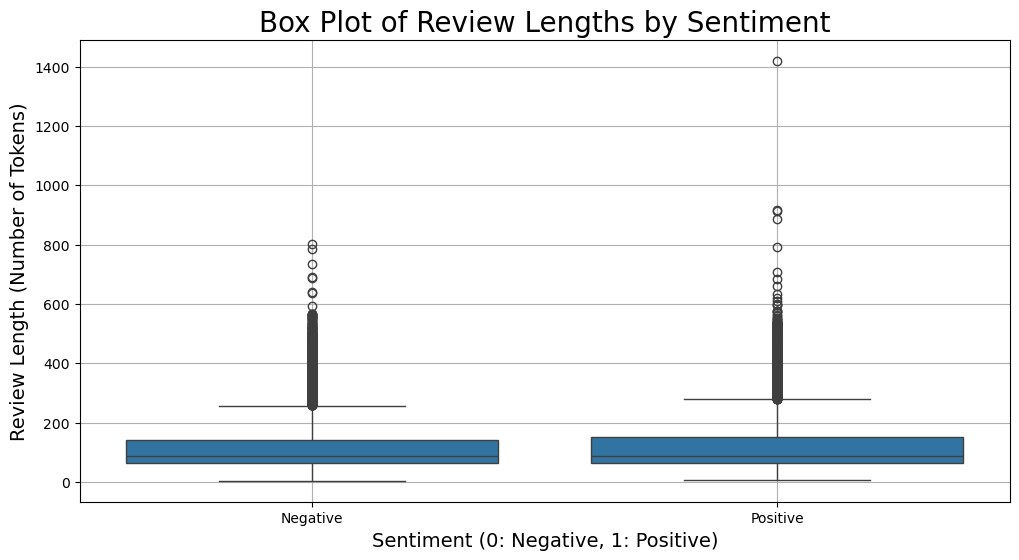

In [66]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Box Plot of Review Lengths by Sentiment', fontsize=20)
plt.xlabel('Sentiment (0: Negative, 1: Positive)', fontsize=14)
plt.ylabel('Review Length (Number of Tokens)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.grid(True)
plt.show()

## Assuming common_words_df contains the most common words and their frequencies

/var/folders/__/myg_fwx179xcwtmwxj8q16_h0000gn/T/ipykernel_91720/1212582658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')


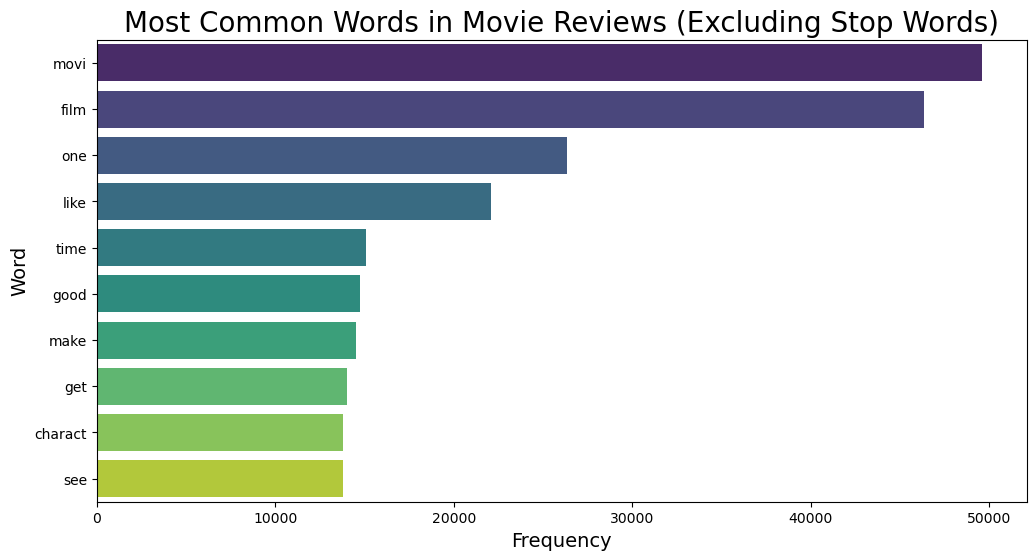

In [67]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Most Common Words in Movie Reviews (Excluding Stop Words)', fontsize=20)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()

## Distribution plot for review lengths by sentiment

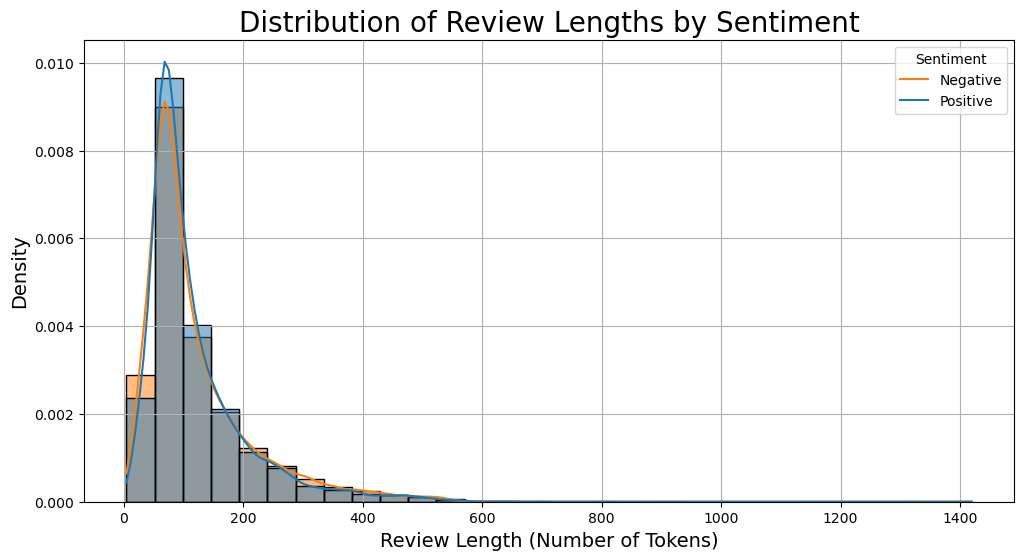

In [68]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Distribution of Review Lengths by Sentiment', fontsize=20)
plt.xlabel('Review Length (Number of Tokens)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.grid(True)
plt.show()

In [69]:
correlation_matrix = df[['review_length', 'sentiment']].corr()

# Print the correlation values
print(correlation_matrix)

               review_length  sentiment
review_length       1.000000   0.022457
sentiment           0.022457   1.000000


## heatmap for visualization

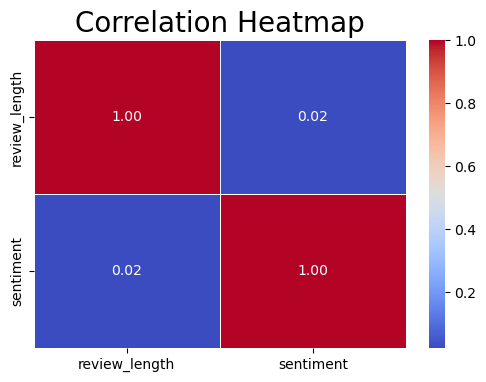

In [70]:

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# models

In [71]:
df

,review,sentiment,text_length,review_length
0,"[cant, deni, movi, often, entertain, alway, pe...",0,183,183
1,"[reason, say, wrote, screenplay, knew, littl, ...",1,96,96
2,"[master, treatment, jame, cain, postman, alway...",1,87,87
3,"[eleph, walk, thoroughli, dull, film, realli, ...",0,285,285
4,"[noth, remot, scari, modern, horror, insult, w...",1,148,148
...,...,...,...,...
24995,"[weird, invers, oscar, academi, award, festiv,...",0,98,98
24996,"[he, stocki, sweati, slightli, crossey, restle...",1,485,485
24997,"[rapid, econom, develop, china, resurg, tradit...",1,78,78
24998,"[first, must, say, made, mistak, watch, elect,...",1,320,320


In [72]:
# Assuming df is your DataFrame with the columns as specified

# Step 1: Reorder the columns
columns = df.columns.tolist()  # Get the list of columns
columns.remove('sentiment')  # Remove 'sentiment' from the list
columns.append('sentiment')  # Append 'sentiment' to the end of the list

# Step 2: Reassign the DataFrame with the new column order
df = df[columns]

# Display the updated DataFrame to confirm the change
print(df.head())  # You can also use df.info() to see the column order

                                              review  text_length  \
0  [cant, deni, movi, often, entertain, alway, pe...          183   
1  [reason, say, wrote, screenplay, knew, littl, ...           96   
2  [master, treatment, jame, cain, postman, alway...           87   
3  [eleph, walk, thoroughli, dull, film, realli, ...          285   
4  [noth, remot, scari, modern, horror, insult, w...          148   

   review_length  sentiment  
0            183          0  
1             96          1  
2             87          1  
3            285          0  
4            148          1  


In [73]:
df

,review,text_length,review_length,sentiment
0,"[cant, deni, movi, often, entertain, alway, pe...",183,183,0
1,"[reason, say, wrote, screenplay, knew, littl, ...",96,96,1
2,"[master, treatment, jame, cain, postman, alway...",87,87,1
3,"[eleph, walk, thoroughli, dull, film, realli, ...",285,285,0
4,"[noth, remot, scari, modern, horror, insult, w...",148,148,1
...,...,...,...,...
24995,"[weird, invers, oscar, academi, award, festiv,...",98,98,0
24996,"[he, stocki, sweati, slightli, crossey, restle...",485,485,1
24997,"[rapid, econom, develop, china, resurg, tradit...",78,78,1
24998,"[first, must, say, made, mistak, watch, elect,...",320,320,1


In [74]:
# Step 1: Prepare the Data
# Features and target variable
X = df['review'].apply(lambda x: ' '.join(x))  # Convert list of tokens back to string
y = df['sentiment']

# Step 2: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Convert Text to Numerical Format
vectorizer = CountVectorizer()  # You can also use TfidfVectorizer() for TF-IDF
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Logistic Regression

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2530
           1       0.87      0.88      0.87      2470

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



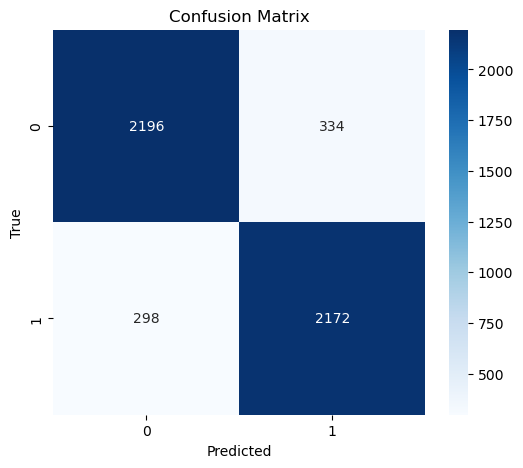

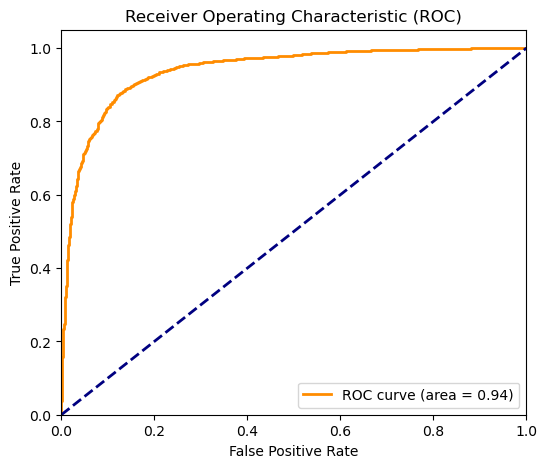

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur

# Fit the model
model.fit(X_train_vectorized, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_vectorized)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Naive Bayes model

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2530
           1       0.87      0.84      0.85      2470

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



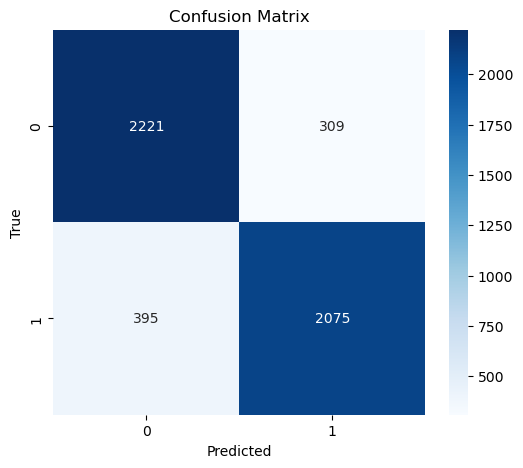

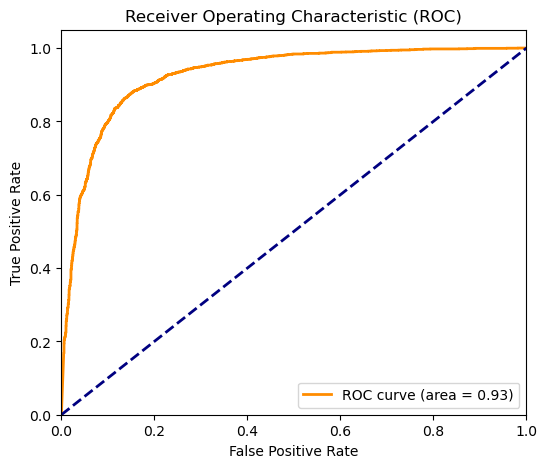

In [76]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Fit the model
model.fit(X_train_vectorized, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the ROC Curve (only for binary classification)
# If you have more than two classes, consider using One-vs-Rest strategy for ROC
if len(model.classes_) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_vectorized)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# If it's a multi-class classification, you can use the following code to plot ROC for each class
else:
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    y_score = model.predict_proba(X_test_vectorized)
    n_classes = len(model.classes_)

    # Plot ROC curve for each class
    plt.figure(figsize=(6, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve class {model.classes_[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Multi-class')
    plt.legend(loc='lower right')
    plt.show()

## SVM

In [77]:
model = SVC(kernel='linear')  # You can choose 'linear', 'rbf', 'poly', etc.

# Fit the model
model.fit(X_train_vectorized, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2530
           1       0.85      0.85      0.85      2470

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



## Random Forest model

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2530
           1       0.85      0.86      0.85      2470

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



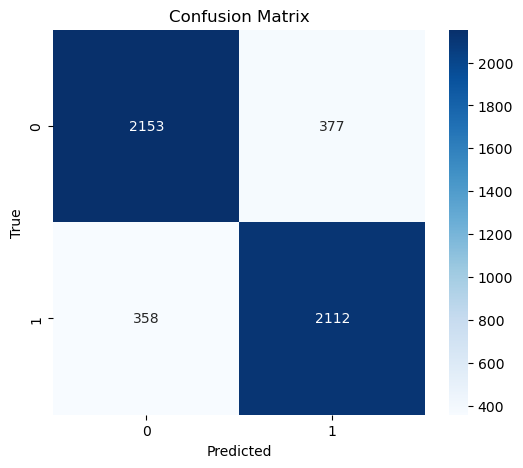

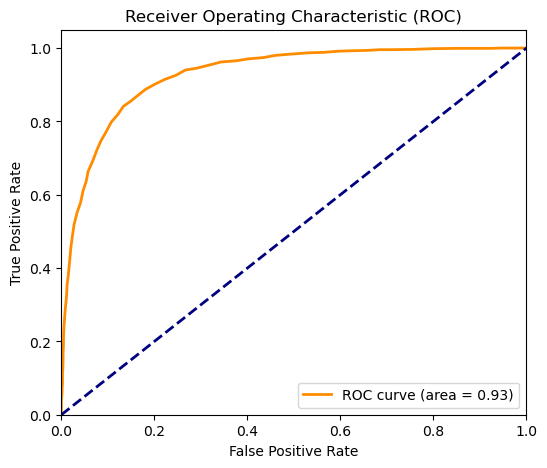

In [79]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train_vectorized, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the ROC Curve (only for binary classification)
# If you have more than two classes, consider using One-vs-Rest strategy for ROC
if len(model.classes_) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_vectorized)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# If it's a multi-class classification, you can use the following code to plot ROC for each class
else:
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    y_score = model.predict_proba(X_test_vectorized)
    n_classes = len(model.classes_)

    # Plot ROC curve for each class
    plt.figure(figsize=(6, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve class {model.classes_[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Multi-class')
    plt.legend(loc='lower right')
    plt.show()